# Project 4 - Advanced Lane Lines

#### Library Import

In [1]:
# Project Libraries
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np
import glob

print('Libraries Imported!')

Libraries Imported!


### Camera Calibration

In [ ]:
# Load calibration images
filelist = os.listdir('./camera_cal')
chessboardImages = [cv2.imread('./camera_cal/{}'.format(image)) for image in filelist]

In [ ]:
# Find the chessboard corners and undistortion matrix
nx = 9
ny = 6

# create object point
objp = np.zeros((ny*nx,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

# Arrays to store object and image points for undistortion
objpoints = []
imgpoints = []

for image in chessboardImages:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
    if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)

In [ ]:
# Use the image and object points to undistort image
test_image = chessboardImages[0]
image_size = (test_image.shape[1], test_image.shape[0])

# Calibrate Camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints,
                                                   imgpoints,image_size,None,None)

dst = cv2.undistort(test_image, mtx, dist, None, mtx)
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,10))
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax1.axis('off')
ax2.imshow(dst)
ax2.set_title('Undistorted Image')
ax1.axis('off')
plt.show()

In [ ]:
# Function to undistort images
def undistort(images):
    imagesUndistort = []
    for image in images:
        image_size = (image.shape[1], image.shape[0])

        # Calibrate Camera
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints,
                                                imgpoints,image_size,None,None)

        imagesUndistort.append(cv2.undistort(image, mtx, dist, None, mtx))
    return np.array(imagesUndistort)

In [ ]:
# Test Function
chessboardUndistorted = undistort(chessboardImages)
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,10))
ax1.imshow(chessboardImages[0])
ax1.set_title('Original Image')
ax1.axis('off')
ax2.imshow(chessboardUndistorted[0])
ax2.set_title('Undistorted Image')
ax1.axis('off')
plt.show()


### Threshold Binary Image

In [2]:
# Load Test Images from file
filelist=[]
for file in os.listdir('./test_images/'):
    if file.endswith('.jpg'):
        filelist.append(file)
    
images = [cv2.imread('./test_images/{}'.format(image)) for image in filelist]

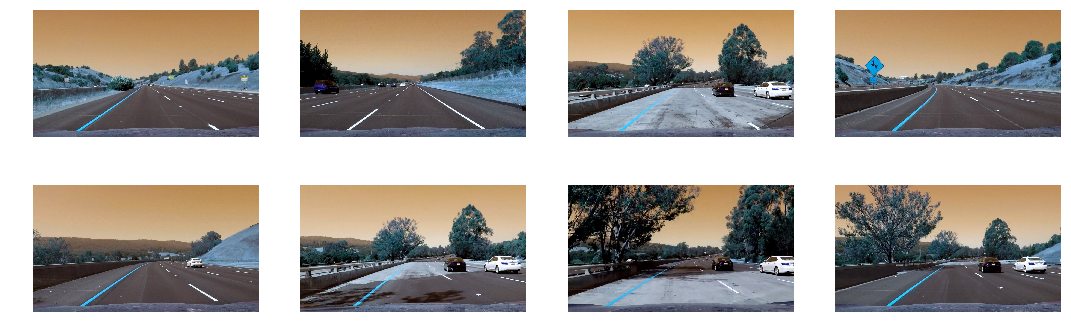

In [3]:
f, ax = plt.subplots(2,4, figsize=(15,5))
ax = ax.ravel()
f.tight_layout()
for i in range(0,len(ax)):
    ax[i].imshow(images[i])
    ax[i].axis('off')
plt.show()

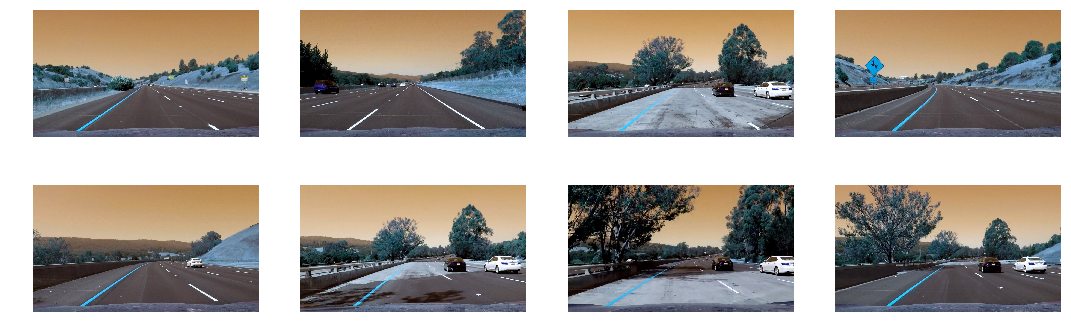

In [4]:
# Undistort Images
# imagesUndist = undistort(images)
imagesUndist = images
f, ax = plt.subplots(2,4, figsize=(15,5))
ax = ax.ravel()
f.tight_layout()
for i in range(0,len(ax)):
    ax[i].imshow(imagesUndist[i])
    ax[i].axis('off')
plt.show()

In [5]:
# Convert to various colorspaces to which pick out lines
images_RGB = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in imagesUndist])
images_R = images_RGB[:,:,:,0]
images_G = images_RGB[:,:,:,1]
images_B = images_RGB[:,:,:,2]

images_HLS = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2HLS) for img in images])
images_H = images_HLS[:,:,:,0]
images_L = images_HLS[:,:,:,1]
images_S = images_HLS[:,:,:,2]

images_HSV = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2HSV) for img in images])
images_H2 = images_HSV[:,:,:,0]
images_S2 = images_HSV[:,:,:,1]
images_V = images_HSV[:,:,:,2]

images_YUV = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2YUV) for img in images])
images_Y = images_YUV[:,:,:,0]
images_U = images_YUV[:,:,:,1]
images_V2 = images_YUV[:,:,:,2]

images_GRAY = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images])

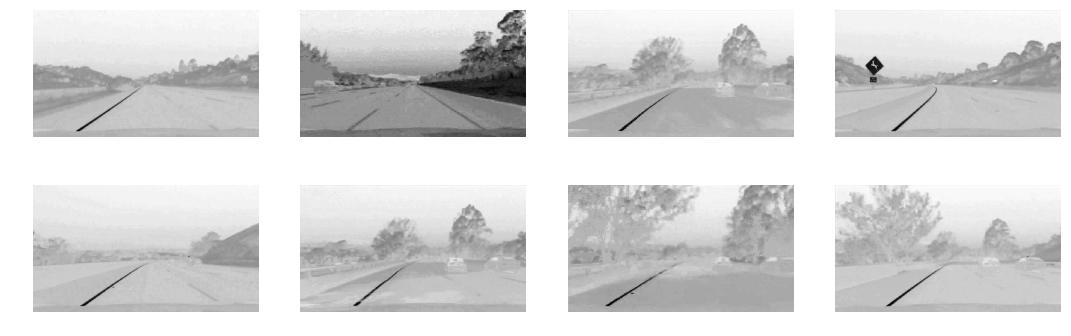

In [6]:
# Plot the colorspace for different colorspaces
f, ax = plt.subplots(2,4, figsize=(15,5))
ax = ax.ravel()
f.tight_layout()
for i in range(0,len(ax)):
    ax[i].imshow(images_V2[i], cmap='gray')
    ax[i].axis('off')
plt.show()

In [9]:
# Apply thresholds to the choosen colorspaces to find the best combination
# R_channel
# H_channel
# S_channel
# V_channel
# V2_channel

def applyThreshold(images, thresh):
    thresholdImages = []
    for image in images:
        binary = np.zeros_like(image)
        binary[(image>thresh[0]) & (image<= thresh[1])] = 1
        thresholdImages.append(binary)
    return np.array(thresholdImages)


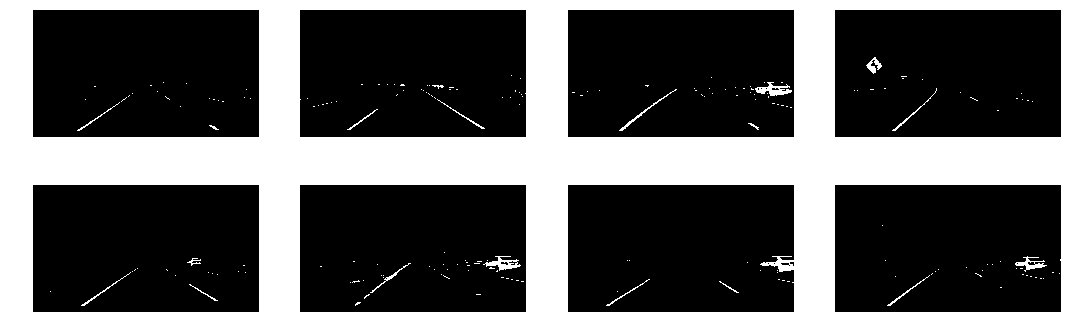

In [10]:
# R_channel
images_Rthresh = applyThreshold(images_R, (220, 255))
f, ax = plt.subplots(2,4, figsize=(15,5))
ax = ax.ravel()
f.tight_layout()
for i in range(0,len(ax)):
    ax[i].imshow(images_Rthresh[i], cmap='gray')
    ax[i].axis('off')
plt.show()

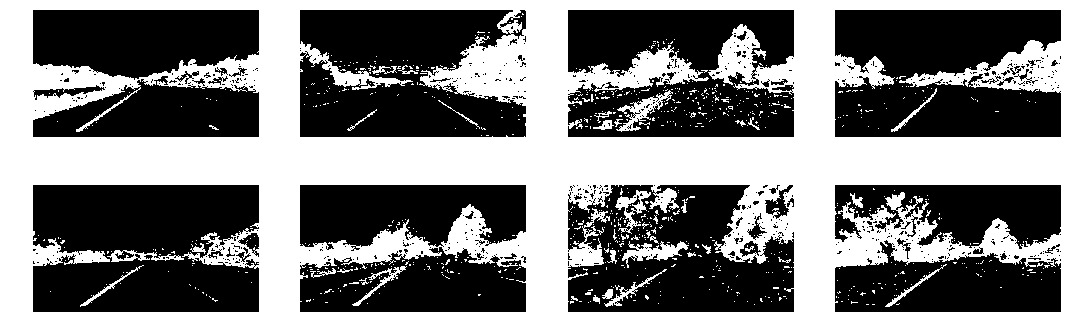

In [11]:
# H_channel
images_Hthresh = applyThreshold(images_H, (15, 100))
f, ax = plt.subplots(2,4, figsize=(15,5))
ax = ax.ravel()
f.tight_layout()
for i in range(0,len(ax)):
    ax[i].imshow(images_Hthresh[i], cmap='gray')
    ax[i].axis('off')
plt.show()

In [ ]:
# S_channel
images_Sthresh = applyThreshold(images_S, (90, 255))
f, ax = plt.subplots(2,4, figsize=(15,5))
ax = ax.ravel()
f.tight_layout()
for i in range(0,len(ax)):
    ax[i].imshow(images_Sthresh[i], cmap='gray')
    ax[i].axis('off')
plt.show()